In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
df = pd.read_csv("House_Price_data.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
selected_features = ['sqft_living', 'sqft_above', 'bathrooms', 'view', 'sqft_basement','bedrooms']

In [5]:
X = df[selected_features]
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Linear Regression

In [8]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [9]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [10]:
np.mean(mse)

-73114475292.11514

In [11]:
reg_pred=regression.predict(X_test)

In [12]:
reg_pred

array([353657.37404308, 397713.39832599, 988057.37404308, ...,
       362265.37404308, 448153.37404308, 488789.38618454])

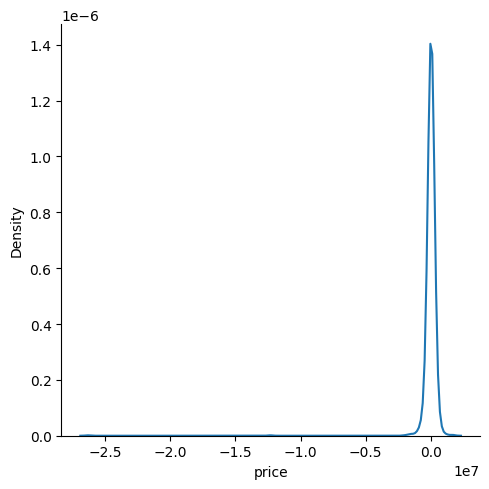

In [13]:
sns.displot(reg_pred-y_test,kind='kde')

In [14]:
score=r2_score(reg_pred,y_test)

In [15]:
score

-7.936573073983263

### Ridge Regression Algorithm

In [16]:
ridge_regressor=Ridge()

In [17]:
ridge_regressor

Ridge()

In [18]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [19]:
print(ridgecv.best_params_)

{'alpha': 30}


In [20]:
print(ridgecv.best_score_)

-73186948314.23491


In [21]:
ridge_pred=ridgecv.predict(X_test)

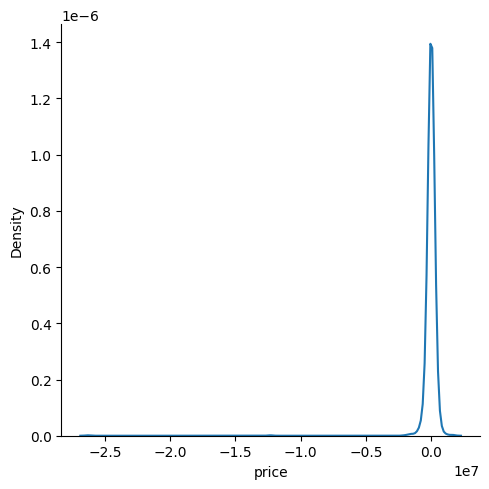

In [22]:
sns.displot(ridge_pred-y_test,kind='kde')

In [23]:
score=r2_score(ridge_pred,y_test)

In [24]:
score

-7.989925871354954

### Lasso Regression

In [25]:

lasso=Lasso()

In [26]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

C:\Users\gujar\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+12, tolerance: 3.745e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\gujar\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.456e+12, tolerance: 3.789e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\gujar\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [27]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 90}
-73188913122.63252


In [28]:
lasso_pred=lassocv.predict(X_test)

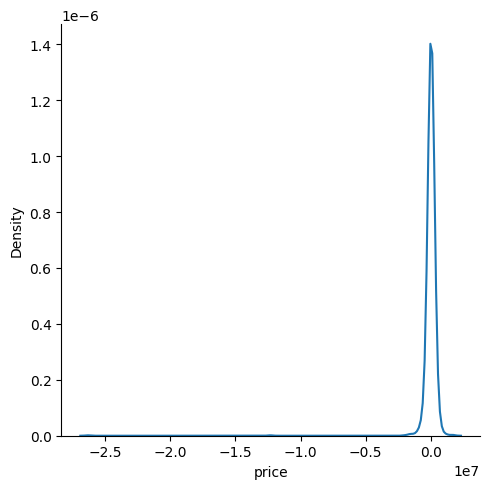

In [29]:
sns.displot(lasso_pred-y_test,kind='kde')